Decision Tree is one of the most powerful and popular algorithms. Python Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables. In this article, We are going to implement a Decision tree in Python algorithm on the Balance Scale Weight & Distance Database presented on the UCI.

Decision Tree

A Decision tree is a tree-like structure that represents a set of decisions and their possible consequences. Each node in the tree represents a decision, and each branch represents an outcome of that decision. The leaves of the tree represent the final decisions or predictions.


Decision trees are created by recursively partitioning the data into smaller and smaller subsets. At each partition, the data is split based on a specific feature, and the split is made in a way that maximizes the information gain.
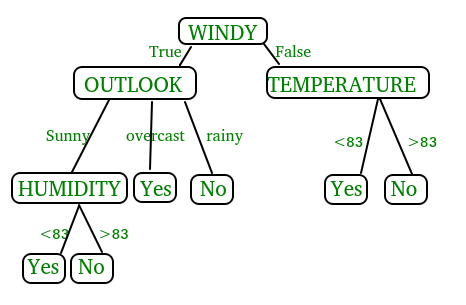

In the above figure, decision tree is a flowchart-like tree structure that is used to make decisions. It consists of Root Node(WINDY), Internal nodes(OUTLOOK, TEMPERATURE), which represent tests on attributes, and leaf nodes, which represent the final decisions. The branches of the tree represent the possible outcomes of the tests.

Key Components of Decision Trees in Python

Root Node: The decision tree’s starting node, which stands for the complete dataset.

Branch Nodes: Internal nodes that represent decision points, where the data is split based on a specific attribute.

Leaf Nodes: Final categorization or prediction-representing terminal nodes.

Decision Rules: Rules that govern the splitting of data at each branch node.

Attribute Selection: The process of choosing the most informative attribute for each split.

Splitting Criteria: Metrics like information gain, entropy, or the Gini Index are used to calculate the optimal split.

Assumptions we make while using Decision tree

At the beginning, we consider the whole training set as the root.

Attributes are assumed to be categorical for information gain and for gini index, attributes are assumed to be continuous.

On the basis of attribute values records are distributed recursively.

We use statistical methods for ordering attributes as root or internal node.
Pseudocode of Decision tree

Find the best attribute and place it on the root node of the tree.

Now, split the training set of the dataset into subsets. While making the subset make sure that each subset of training dataset should have the same value for an attribute.

Find leaf nodes in all branches by repeating 1 and 2 on each subset.
Key concept in Decision Tree

Gini index and information gain both of these methods are used to select from the n attributes of the dataset which attribute would be placed at the root node or the internal node.

Gini index
image.png\text { Gini Index }=1-\sum_{j}{ }_{\mathrm{j}}^{2}                          

Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified.

It means an attribute with lower gini index should be preferred.
Sklearn supports “gini” criteria for Gini Index and by default, it takes “gini” value.

Entropy
If a random variable x can take N different value, the i’value x_{i}       with probability p_{ii}       we can associate the following entropy with x :

image.pngH(x)= -\sum_{i=1}^{N}p(x_{i})log_{2}p(x_{i})   

Entropy is the measure of uncertainty of a random variable, it characterizes the impurity of an arbitrary collection of examples. The higher the entropy the more the information content.
Information Gain
Definition: Suppose S is a set of instances, A is an attribute, S_{v}       is the subset of s with A = v and Values(A) is the set of all possible of A, then

The entropy typically changes when we use a node in a Python decision tree to partition the training instances into smaller subsets. Information gain is a measure of this change in entropy.
Sklearn supports “entropy” criteria for Information Gain and if we want to use Information Gain method in sklearn then we have to mention it explicitly.
Python Decision Tree Implementation
Dataset Description:

While implementing the decision tree in Python we will go through the following two phases:

Building Phase
Preprocess the dataset.
Split the dataset from train and test using Python sklearn package.
Train the classifier.
Operational Phase
Make predictions.
Calculate the accuracy.

Data Import

To import and manipulate the data we are using the pandas package provided in python.
Here, we are using a URL which is directly fetching the dataset from the UCI site no need to download the dataset. When you try to run this code on your system make sure the system should have an active Internet connection.
As the dataset is separated by “,” so we have to pass the sep parameter’s value as “,”.
Another thing is notice is that the dataset doesn’t contain the header so we will pass the Header parameter’s value as none. If we will not pass the header parameter then it will consider the first line of the dataset as the header.


Data Slicing

Before training the model we have to split the dataset into the training and testing dataset.
To split the dataset for training and testing we are using the sklearn module train_test_split
First of all we have to separate the target variable from the attributes in the dataset.


X = balance_data.values[:, 1:5]
Y = balance_data.values[:,0]

Above are the lines from the code which separate the dataset. The variable X contains the attributes while the variable Y contains the target variable of the dataset.

Next step is to split the dataset for training and testing purpose.

X_train, X_test, y_train, y_test = train_test_split(
          X, Y, test_size = 0.3, random_state = 100)

Building a Decision Tree in Python
Below is the code for the sklearn decision tree in Python.


Import Library
Importing the necessary libraries required for the implementation of decision tree in Python.

In [1]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [2]:
# Function to import the dataset
def importdata():
	balance_data = pd.read_csv(
		'https://archive.ics.uci.edu/ml/machine-learning-' +
		'databases/balance-scale/balance-scale.data',
		sep=',', header=None)

	# Displaying dataset information
	print("Dataset Length: ", len(balance_data))
	print("Dataset Shape: ", balance_data.shape)
	print("Dataset: ", balance_data.head())

	return balance_data


Data Splitting

splitdataset(balance_data): This function defines the splitdataset() function, which is responsible for splitting the dataset into training and testing sets. It separates the target variable (class labels) from the features and splits the data using the train_test_split() function from scikit-learn. It sets the test size to 30% and uses a random state of 100 for reproducibility.

In [3]:
# Function to split the dataset into features and target variables
def splitdataset(balance_data):

	# Separating the target variable
	X = balance_data.values[:, 1:5]
	Y = balance_data.values[:, 0]

	# Splitting the dataset into train and test
	X_train, X_test, y_train, y_test = train_test_split(
		X, Y, test_size=0.3, random_state=100)

	return X, Y, X_train, X_test, y_train, y_test


Training with Gini Index:


train_using_gini(X_train, X_test, y_train): This function defines the train_using_gini() function, which is responsible for training a decision tree classifier using the Gini index as the splitting criterion. It creates a classifier object with the specified parameters (criterion, random state, max depth, min samples leaf) and trains it on the training data.
   


In [4]:
def train_using_gini(X_train, X_test, y_train):

	# Creating the classifier object
	clf_gini = DecisionTreeClassifier(criterion="gini",
									random_state=100, max_depth=3, min_samples_leaf=5)

	# Performing training
	clf_gini.fit(X_train, y_train)
	return clf_gini


Training with Entropy:


tarin_using_entropy(X_train, X_test, y_train): This function defines the tarin_using_entropy() function, which is responsible for training a decision tree classifier using entropy as the splitting criterion. It creates a classifier object with the specified parameters (criterion, random state, max depth, min samples leaf) and trains it on the training data.

In [5]:
def tarin_using_entropy(X_train, X_test, y_train):

	# Decision tree with entropy
	clf_entropy = DecisionTreeClassifier(
		criterion="entropy", random_state=100,
		max_depth=3, min_samples_leaf=5)

	# Performing training
	clf_entropy.fit(X_train, y_train)
	return clf_entropy


Prediction and Evaluation:

prediction(X_test, clf_object): This function defines the prediction() function, which is responsible for making predictions on the test data using the trained classifier object. It passes the test data to the classifier’s predict() method and prints the predicted class labels.

cal_accuracy(y_test, y_pred): This function defines the cal_accuracy() function, which is responsible for calculating the accuracy of the predictions. It calculates and prints the confusion matrix, accuracy score, and classification report, providing detailed performance evaluation.
   


In [6]:
# Function to make predictions
def prediction(X_test, clf_object):
	y_pred = clf_object.predict(X_test)
	print("Predicted values:")
	print(y_pred)
	return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
	print("Confusion Matrix: ",
		confusion_matrix(y_test, y_pred))
	print("Accuracy : ",
		accuracy_score(y_test, y_pred)*100)
	print("Report : ",
		classification_report(y_test, y_pred))


Plots the Decision Tree

By using  plot_tree function from the sklearn.tree submodule to plot the decision tree. The function takes the following arguments:


clf_object: The trained decision tree model object.
filled=True: This argument fills the nodes of the tree with different colors based on the predicted class majority.
feature_names: This argument provides the names of the features used in the decision tree.
class_names: This argument provides the names of the different classes.
rounded=True: This argument rounds the corners of the nodes for a more aesthetically pleasing appearance

In [7]:
# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
	plt.figure(figsize=(15, 10))
	plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
	plt.show()


This defines two decision tree classifiers, training and visualization of decision trees based on different splitting criteria, one using the Gini index and the other using entropy,

In [8]:
if __name__ == "__main__":
	data = importdata()
	X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

	clf_gini = train_using_gini(X_train, X_test, y_train)
	clf_entropy = train_using_entropy(X_train, X_test, y_train)

	# Visualizing the Decision Trees
	plot_decision_tree(clf_gini, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])
	plot_decision_tree(clf_entropy, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])


Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5


NameError: name 'train_using_entropy' is not defined

Using Gini Index

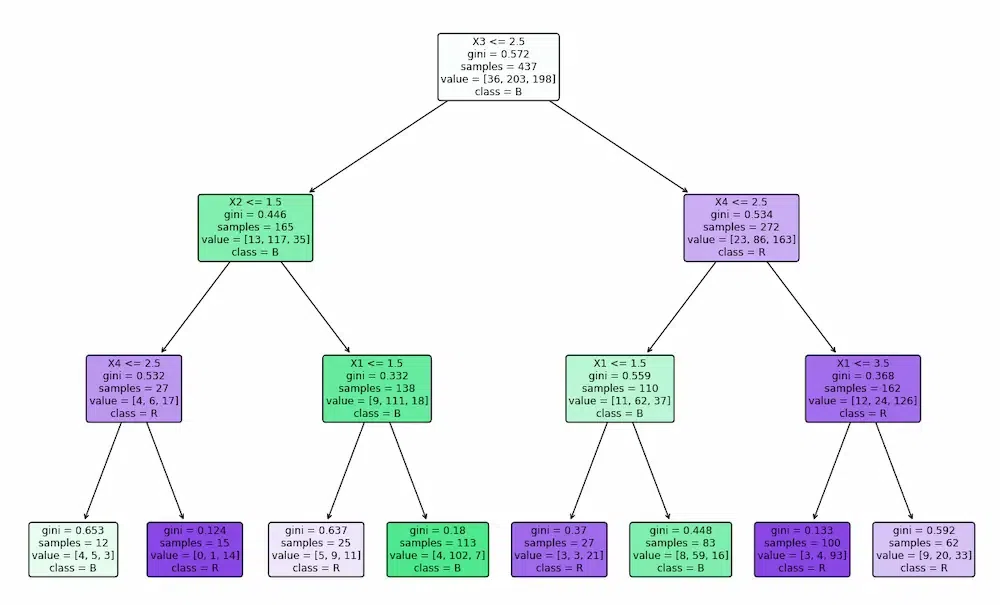

Using Entropy
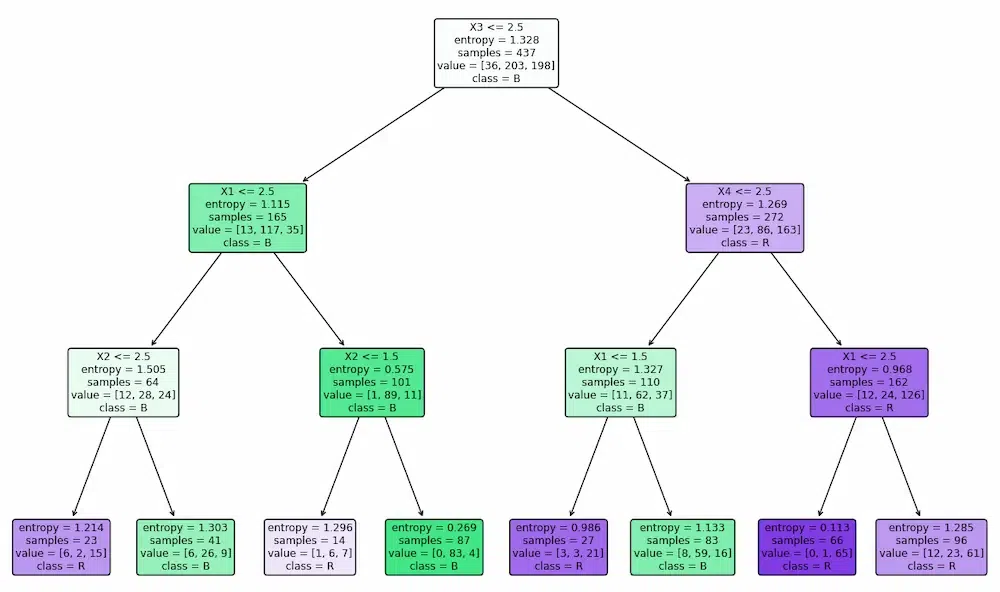

It performs the operational phase of the decision tree model, which involves:


Imports and splits data for training and testing.

Uses Gini and entropy criteria to train two decision trees.

Generates class labels for test data using each model.

Calculates and compares accuracy of both models.
Evaluates the performance of the trained decision trees on the unseen test data and provides insights into their effectiveness for the specific classification task and evaluates their performance on a dataset using the confusion matrix, accuracy score, and classification report.


Results using Gini Index

In [9]:
# Operational Phase
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)


Results Using Gini Index:
Predicted values:
['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']
Confusion Matrix:  [[ 0  6  7]
 [ 0 67 18]
 [ 0 19 71]]
Accuracy :  73.40425531914893
Report :                precision    recall  f1-score   support

           B       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results using Entropy

In [10]:
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)


Results Using Entropy:


NameError: name 'clf_entropy' is not defined